In [1]:
"""
================================================================================
DEEP NEURAL NETWORKS - ASSIGNMENT 3: RNN vs TRANSFORMER FOR TIME SERIES
Recurrent Neural Networks vs Transformers for Time Series Prediction
================================================================================
"""

'\n================================================================================\nDEEP NEURAL NETWORKS - ASSIGNMENT 3: RNN vs TRANSFORMER FOR TIME SERIES\nRecurrent Neural Networks vs Transformers for Time Series Prediction\n================================================================================\n'

In [2]:
"""
================================================================================
STUDENT INFORMATION (REQUIRED - DO NOT DELETE)
================================================================================

BITS ID: 2025AA05991
Name: Vipul Prakash Chaudhari
Email: 2025aa05991@wilp.bits-pilani.ac.in
Date: 07-02-2026

================================================================================
"""

'\n================================================================================\nSTUDENT INFORMATION (REQUIRED - DO NOT DELETE)\n================================================================================\n\nBITS ID: 2025AA05991\nName: Vipul Prakash Chaudhari\nEmail: 2025aa05991@wilp.bits-pilani.ac.in\nDate: 07-02-2026\n\n================================================================================\n'

In [3]:
"""
================================================================================
ASSIGNMENT OVERVIEW
================================================================================

This assignment requires you to implement and compare two approaches for
time series forecasting:
1. LSTM or GRU using Keras/PyTorch
2. Transformer encoder using Keras/PyTorch layers

Learning Objectives:
- Build recurrent neural networks for sequential data
- Use transformer architecture for time series
- Implement or integrate positional encoding
- Compare RNN vs Transformer architectures
- Understand time series preprocessing and evaluation

IMPORTANT:
- Positional encoding MUST be added to transformer
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Use temporal train/test split (NO shuffling)

================================================================================
"""

'\n================================================================================\nASSIGNMENT OVERVIEW\n================================================================================\n\nThis assignment requires you to implement and compare two approaches for \ntime series forecasting:\n1. LSTM or GRU using Keras/PyTorch\n2. Transformer encoder using Keras/PyTorch layers\n\nLearning Objectives:\n- Build recurrent neural networks for sequential data\n- Use transformer architecture for time series\n- Implement or integrate positional encoding\n- Compare RNN vs Transformer architectures\n- Understand time series preprocessing and evaluation\n\nIMPORTANT: \n- Positional encoding MUST be added to transformer\n- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention\n- DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)\n- Use temporal train/test split (NO shuffling)\n\n================================================================================\n'

In [4]:
"""
================================================================================
⚠️ IMPORTANT SUBMISSION REQUIREMENTS - STRICTLY ENFORCED ⚠️
================================================================================

1. FILENAME FORMAT: <BITS_ID>_rnn_assignment.ipynb
   Example: 2025AA05036_rnn_assignment.ipynb
   ❌ Wrong filename = Automatic 0 marks

2. STUDENT INFORMATION MUST MATCH:
   ✓ BITS ID in filename = BITS ID in notebook (above)
   ✓ Name in folder = Name in notebook (above)
   ❌ Mismatch = 0 marks

3. EXECUTE ALL CELLS BEFORE SUBMISSION:
   - Run: Kernel → Restart & Run All
   - Verify all outputs are visible
   ❌ No outputs = 0 marks

4. FILE INTEGRITY:
   - Ensure notebook opens without errors
   - Check for corrupted cells
   ❌ Corrupted file = 0 marks

5. IMPLEMENTATION REQUIREMENTS:
   - MUST add positional encoding to transformer (custom or built-in)
   - CAN use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
   - DO NOT use pre-trained transformers (HuggingFace, TimeGPT, etc.)
   - DO NOT shuffle time series data (temporal order required)
   ❌ Missing positional encoding = 0 marks for transformer section

6. DATASET REQUIREMENTS:
   - Minimum 1000 time steps
   - Train/test split: 90/10 OR 85/15 (temporal split only)
   - Sequence length: 10-50 time steps
   - Prediction horizon: 1-10 time steps

7. USE KERAS OR PYTORCH:
   - Use framework's LSTM/GRU layers
   - Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
   - Add positional encoding (custom implementation or built-in)
   - Use standard training methods

8. FILE SUBMISSION:
   - Submit ONLY the .ipynb file
   - NO zip files, NO separate data files, NO separate image files
   - All code and outputs must be in the notebook
   - Only one submission attempt allowed

================================================================================
"""

"\n================================================================================\n⚠️ IMPORTANT SUBMISSION REQUIREMENTS - STRICTLY ENFORCED ⚠️\n================================================================================\n\n1. FILENAME FORMAT: <BITS_ID>_rnn_assignment.ipynb\n   Example: 2025AA05036_rnn_assignment.ipynb\n   ❌ Wrong filename = Automatic 0 marks\n\n2. STUDENT INFORMATION MUST MATCH:\n   ✓ BITS ID in filename = BITS ID in notebook (above)\n   ✓ Name in folder = Name in notebook (above)\n   ❌ Mismatch = 0 marks\n\n3. EXECUTE ALL CELLS BEFORE SUBMISSION:\n   - Run: Kernel → Restart & Run All\n   - Verify all outputs are visible\n   ❌ No outputs = 0 marks\n\n4. FILE INTEGRITY:\n   - Ensure notebook opens without errors\n   - Check for corrupted cells\n   ❌ Corrupted file = 0 marks\n\n5. IMPLEMENTATION REQUIREMENTS:\n   - MUST add positional encoding to transformer (custom or built-in)\n   - CAN use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention\n   - DO 

In [5]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
import json
import os
import math

Deep learning frameworks (choose Keras or PyTorch)

In [6]:
# Deep Learning Framework Imports (using TensorFlow/Keras)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input, LayerNormalization
from tensorflow.keras.layers import MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam

print(f"TensorFlow Version: {tf.__version__}")
print("GPU Available:", tf.config.list_physical_devices('GPU'))

TensorFlow Version: 2.19.0
GPU Available: []


1.1 Dataset Selection and Loading

In [7]:
# Download real HPE stock price data
import yfinance as yf

# Download HPE stock data
ticker = "HPE"
start_date = "2020-01-01"
end_date = "2026-02-08"

print(f"Downloading {ticker} stock data from {start_date} to {end_date}...")
hpe_data = yf.download(ticker, start=start_date, end=end_date, progress=False)

# Extract closing prices as our time series
stock_prices = hpe_data['Close'].values

print(f"Downloaded {len(stock_prices)} data points")
print(f"Date range: {hpe_data.index[0]} to {hpe_data.index[-1]}")
print(f"Price range: ${stock_prices.min():.2f} - ${stock_prices.max():.2f}")

# REQUIRED: Fill in these metadata fields
dataset_name = "HPE Stock Prices"
dataset_source = "Yahoo Finance (yfinance) - Historical closing prices"
n_samples = len(stock_prices)  # Total number of time steps
n_features = 1  # Univariate time series
sequence_length = 30  # Lookback window (within 10-50 range)
prediction_horizon = 1  # Single-step ahead prediction
problem_type = "time_series_forecasting"


/tmp/ipython-input-1623550881.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hpe_data = yf.download(ticker, start=start_date, end=end_date, progress=False)


Downloaded 1533 data points
Date range: 2020-01-02 00:00:00 to 2026-02-06 00:00:00
Price range: $6.54 - $26.09


In [8]:
# Primary metric selection
primary_metric = "RMSE"
metric_justification = """
RMSE is chosen because it heavily penalizes large prediction errors, which is crucial for HPE stock price forecasting where significant deviations can lead to substantial financial losses. RMSE provides better interpretability in the original unit (dollars).
"""


In [9]:
print("\n" + "="*70)
print("DATASET INFORMATION")
print("="*70)
print(f"Dataset: {dataset_name}")
print(f"Source: {dataset_source}")
print(f"Total Samples: {n_samples}")
print(f"Number of Features: {n_features}")
print(f"Sequence Length: {sequence_length}")
print(f"Prediction Horizon: {prediction_horizon}")
print(f"Primary Metric: {primary_metric}")
print(f"Metric Justification: {metric_justification}")
print("="*70)


DATASET INFORMATION
Dataset: HPE Stock Prices
Source: Yahoo Finance (yfinance) - Historical closing prices
Total Samples: 1533
Number of Features: 1
Sequence Length: 30
Prediction Horizon: 1
Primary Metric: RMSE
Metric Justification: 
RMSE is chosen because it heavily penalizes large prediction errors, which is crucial for HPE stock price forecasting where significant deviations can lead to substantial financial losses. RMSE provides better interpretability in the original unit (dollars).



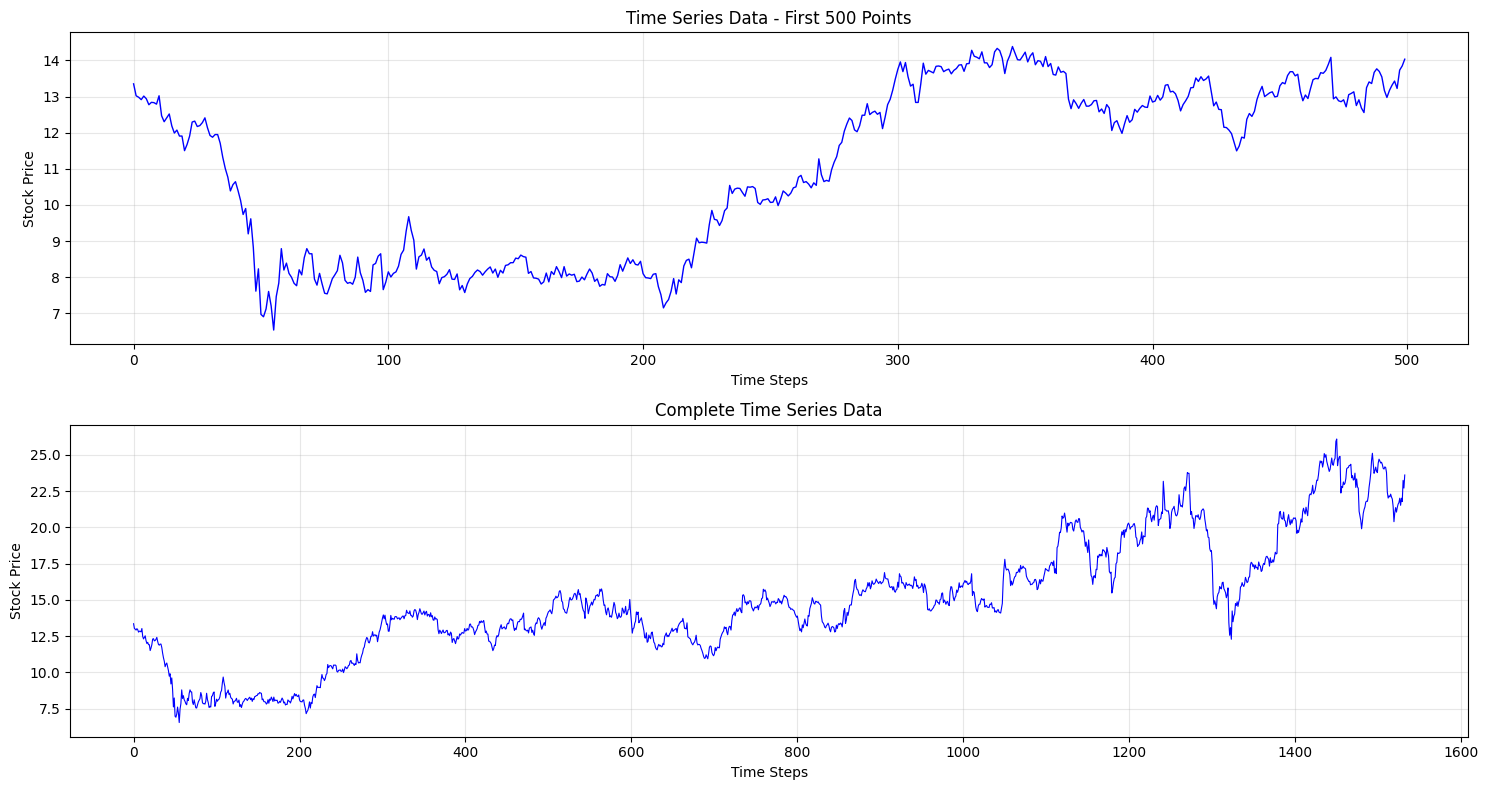

Dataset Statistics:
Mean: 14.93
Std: 4.18
Min: 6.54
Max: 26.09


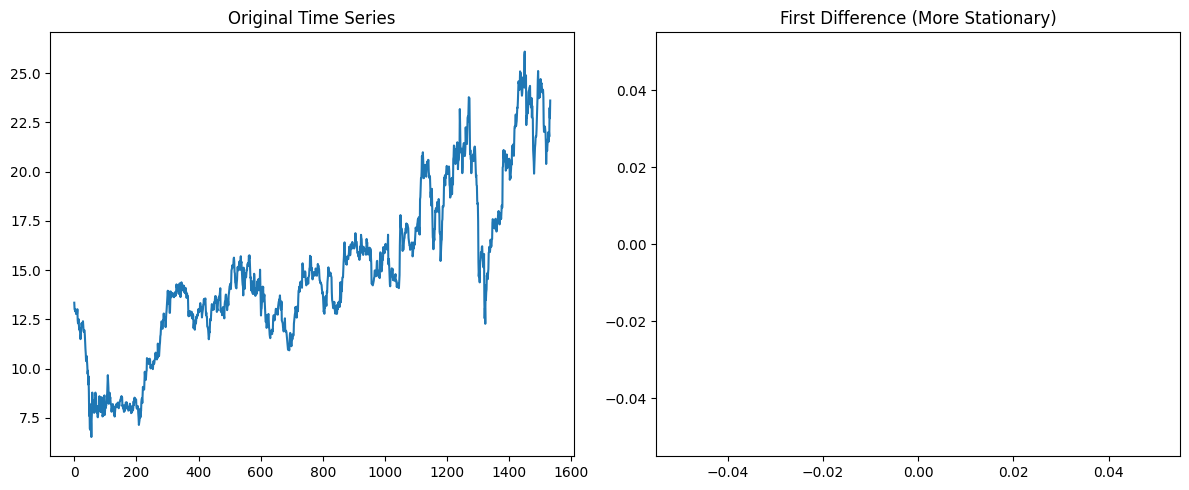

In [10]:
# Plot time series data
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(stock_prices[:500], 'b-', linewidth=1)
plt.title('Time Series Data - First 500 Points')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(stock_prices, 'b-', linewidth=0.8)
plt.title('Complete Time Series Data')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Basic statistics
print(f"Dataset Statistics:")
print(f"Mean: {np.mean(stock_prices):.2f}")
print(f"Std: {np.std(stock_prices):.2f}")
print(f"Min: {np.min(stock_prices):.2f}")
print(f"Max: {np.max(stock_prices):.2f}")

# Check for stationarity (visual inspection)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(stock_prices)
plt.title('Original Time Series')

plt.subplot(1, 2, 2)
plt.plot(np.diff(stock_prices))
plt.title('First Difference (More Stationary)')
plt.tight_layout()
plt.show()

1.3 Data Preprocessing

In [11]:
def preprocess_timeseries(data):
    """
    Preprocess time series data

    Args:
        data: raw time series data

    Returns:
        preprocessed data, scaler
    """
    # Reshape data for scaling
    data_reshaped = data.reshape(-1, 1)

    # Use MinMaxScaler for better neural network training
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data_reshaped)

    return scaled_data.flatten(), scaler

In [12]:
def create_sequences(data, seq_length, pred_horizon):
    """
    Create sequences for time series prediction

    Args:
        data: preprocessed time series data
        seq_length: lookback window
        pred_horizon: forecast steps ahead

    Returns:
        X: input sequences, y: target values
    """
    X, y = [], []

    for i in range(seq_length, len(data) - pred_horizon + 1):
        # Input sequence: [t-seq_length, ..., t-1]
        X.append(data[i-seq_length:i])
        # Target: [t] for single-step prediction
        y.append(data[i])

    return np.array(X), np.array(y)

In [13]:
# Preprocess the data
scaled_data, scaler = preprocess_timeseries(stock_prices)

# Create sequences
X, y = create_sequences(scaled_data, sequence_length, prediction_horizon)

print(f"Sequences created:")
print(f"X shape: {X.shape}")  # (samples, sequence_length)
print(f"y shape: {y.shape}")  # (samples,)

# Reshape X for LSTM/GRU input: (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))
print(f"X reshaped: {X.shape}")

# TEMPORAL train/test split (NO SHUFFLING)
train_size = int(0.85 * len(X))  # 85/15 split
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"\nTrain/Test Split:")
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Train/Test ratio: {len(X_train)/(len(X_train)+len(X_test))*100:.0f}/{len(X_test)/(len(X_train)+len(X_test))*100:.0f}")

Sequences created:
X shape: (1503, 30)
y shape: (1503,)
X reshaped: (1503, 30, 1)

Train/Test Split:
Training samples: 1277
Testing samples: 226
Train/Test ratio: 85/15


In [14]:
# REQUIRED: Temporal train/test split (NO SHUFFLING)
train_test_ratio = "85/15"
train_samples = len(X_train)  # Number of training sequences
test_samples = len(X_test)  # Number of test sequences

In [15]:
print(f"\nTrain/Test Split: {train_test_ratio}")
print(f"Training Samples: {train_samples}")
print(f"Test Samples: {test_samples}")
print("⚠️  IMPORTANT: Temporal split used (NO shuffling)")


Train/Test Split: 85/15
Training Samples: 1277
Test Samples: 226
⚠️  IMPORTANT: Temporal split used (NO shuffling)


In [16]:
"""
================================================================================
PART 2: LSTM/GRU IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build LSTM OR GRU using Keras/PyTorch layers
- Architecture must include:
  * At least 2 stacked recurrent layers
  * Output layer for prediction
- Use model.compile() and model.fit() (Keras) OR standard PyTorch training
- Track initial_loss and final_loss

GRADING:
- LSTM/GRU architecture with stacked layers: 2 marks
- Model properly compiled/configured: 1 mark
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

'\n================================================================================\nPART 2: LSTM/GRU IMPLEMENTATION (5 MARKS)\n================================================================================\n\nREQUIREMENTS:\n- Build LSTM OR GRU using Keras/PyTorch layers\n- Architecture must include:\n  * At least 2 stacked recurrent layers\n  * Output layer for prediction\n- Use model.compile() and model.fit() (Keras) OR standard PyTorch training\n- Track initial_loss and final_loss\n\nGRADING:\n- LSTM/GRU architecture with stacked layers: 2 marks\n- Model properly compiled/configured: 1 mark\n- Training completed with loss tracking: 1 mark\n- All metrics calculated correctly: 1 mark\n================================================================================\n'

2.1 LSTM/GRU Architecture Design

In [17]:
def build_rnn_model(model_type, input_shape, hidden_units, n_layers, output_size):
    """
    Build LSTM or GRU model

    Args:
        model_type: string ('LSTM' or 'GRU')
        input_shape: tuple (sequence_length, n_features)
        hidden_units: number of hidden units per layer
        n_layers: number of stacked layers (minimum 2)
        output_size: prediction horizon

    Returns:
        model: compiled RNN model
    """
    model = Sequential()

    # First RNN layer
    if model_type.upper() == 'LSTM':
        model.add(LSTM(hidden_units, return_sequences=True, input_shape=input_shape))
    elif model_type.upper() == 'GRU':
        model.add(GRU(hidden_units, return_sequences=True, input_shape=input_shape))
    else:
        raise ValueError("model_type must be 'LSTM' or 'GRU'")

    model.add(Dropout(0.2))

    # Additional stacked layers
    for i in range(n_layers - 2):  # -2 because we already added first layer and will add last layer
        if model_type.upper() == 'LSTM':
            model.add(LSTM(hidden_units, return_sequences=True))
        else:
            model.add(GRU(hidden_units, return_sequences=True))
        model.add(Dropout(0.2))

    # Last RNN layer (return_sequences=False for final output)
    if model_type.upper() == 'LSTM':
        model.add(LSTM(hidden_units, return_sequences=False))
    else:
        model.add(GRU(hidden_units, return_sequences=False))

    model.add(Dropout(0.2))

    # Output layer
    model.add(Dense(output_size))

    return model

In [18]:
# Create RNN model
rnn_model = build_rnn_model('LSTM', (sequence_length, n_features), 64, 3, prediction_horizon)

print("RNN Model Architecture:")
rnn_model.summary()

# Count parameters
rnn_total_params = rnn_model.count_params()
print(f"\nTotal Parameters: {rnn_total_params:,}")

RNN Model Architecture:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,009 (324.25 KB)

 Trainable params: 83,009 (324.25 KB)

 Non-trainable params: 0 (0.00 B)


Total Parameters: 83,009


In [19]:
# Compile model
rnn_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print("RNN Model compiled successfully!")
print("Optimizer: Adam (lr=0.001)")
print("Loss: Mean Squared Error (MSE)")
print("Metrics: Mean Absolute Error (MAE)")

RNN Model compiled successfully!
Optimizer: Adam (lr=0.001)
Loss: Mean Squared Error (MSE)
Metrics: Mean Absolute Error (MAE)


2.2 Train RNN Model

In [20]:
print("\n" + "="*70)
print("RNN MODEL TRAINING")
print("="*70)


RNN MODEL TRAINING


In [21]:
# Track training time
rnn_start_time = time.time()

In [22]:
# Train the RNN model
history = rnn_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1,
    shuffle=False  # Important: No shuffling to maintain temporal order
)

print("RNN model training completed!")

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 64ms/step - loss: 0.0081 - mae: 0.0677 - val_loss: 0.0094 - val_mae: 0.0773
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0229 - mae: 0.1306 - val_loss: 0.0089 - val_mae: 0.0771
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0264 - mae: 0.1398 - val_loss: 0.0110 - val_mae: 0.0841
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.0270 - mae: 0.1373 - val_loss: 0.0098 - val_mae: 0.0804
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0175 - mae: 0.1044 - val_loss: 0.0052 - val_mae: 0.0582
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 0.0036 - mae: 0.0433 - val_loss: 0.0054 - val_mae: 0.0585
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0032 - mae: 0.0404 - val_loss: 0.0044 - val_mae: 0.0538
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.0030 - mae: 0.0384 - val_loss: 0.0044 - val_mae: 0.0538
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 0.003

In [23]:
rnn_training_time = time.time() - rnn_start_time

In [24]:
# REQUIRED: Track initial and final loss
rnn_initial_loss = float(history.history['loss'][0])  # First epoch loss
rnn_final_loss = float(history.history['loss'][-1])   # Last epoch loss

In [25]:
print(f"Training completed in {rnn_training_time:.2f} seconds")
print(f"Initial Loss: {rnn_initial_loss:.4f}")
print(f"Final Loss: {rnn_final_loss:.4f}")
print("="*70)

Training completed in 146.21 seconds
Initial Loss: 0.0073
Final Loss: 0.0020


2.3 Evaluate RNN Model

In [26]:
# Make predictions on test set
rnn_predictions = rnn_model.predict(X_test)

# Inverse transform predictions and actual values to original scale
rnn_pred_original = scaler.inverse_transform(rnn_predictions.reshape(-1, 1)).flatten()
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

print(f"RNN Predictions shape: {rnn_predictions.shape}")
print(f"Test data shape: {y_test.shape}")
print("Inverse transformation completed.")

8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step
RNN Predictions shape: (226, 1)
Test data shape: (226,)
Inverse transformation completed.


In [27]:
def calculate_mape(y_true, y_pred):
    """Calculate Mean Absolute Percentage Error"""
    # Avoid division by zero by adding small epsilon
    epsilon = 1e-8
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

In [28]:
# REQUIRED: Calculate all 4 metrics
rnn_mae = float(mean_absolute_error(y_test_original, rnn_pred_original))
rnn_rmse = float(np.sqrt(mean_squared_error(y_test_original, rnn_pred_original)))
rnn_mape = float(calculate_mape(y_test_original, rnn_pred_original))
rnn_r2 = float(r2_score(y_test_original, rnn_pred_original))

In [29]:
print("\nRNN Model Performance:")
print(f"MAE:   {rnn_mae:.4f}")
print(f"RMSE:  {rnn_rmse:.4f}")
print(f"MAPE:  {rnn_mape:.4f}%")
print(f"R² Score: {rnn_r2:.4f}")


RNN Model Performance:
MAE:   0.8651
RMSE:  1.0575
MAPE:  4.6329%
R² Score: 0.8980


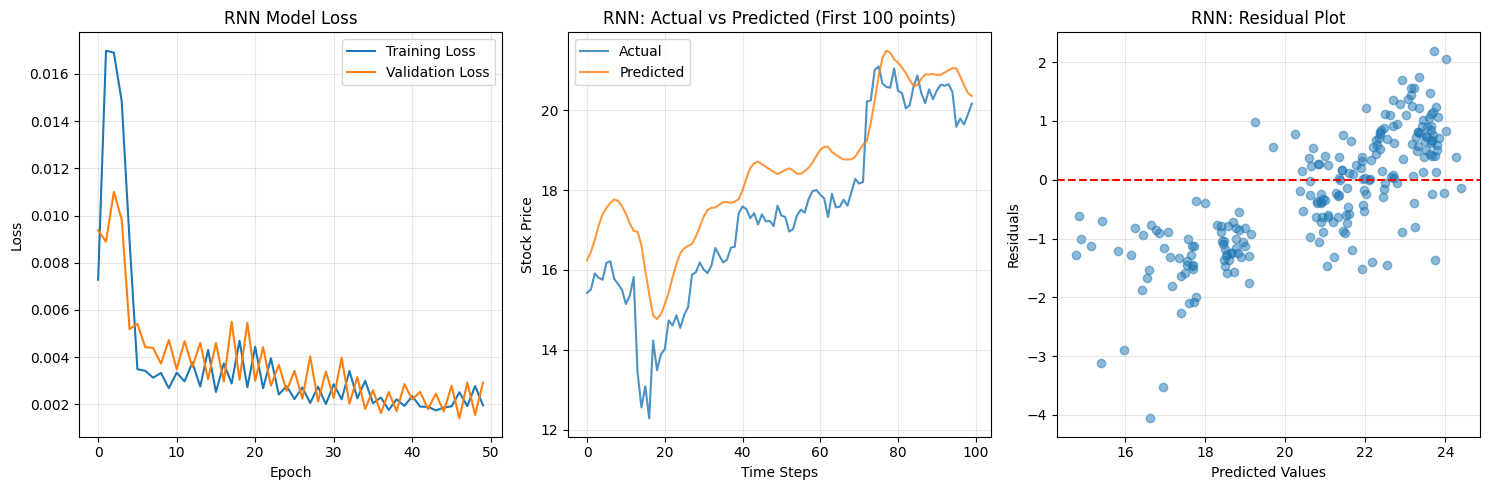

In [30]:
# Plot training loss curve
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot actual vs predicted values
plt.subplot(1, 3, 2)
plt.plot(y_test_original[:100], label='Actual', alpha=0.8)
plt.plot(rnn_pred_original[:100], label='Predicted', alpha=0.8)
plt.title('RNN: Actual vs Predicted (First 100 points)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot residuals
plt.subplot(1, 3, 3)
residuals = y_test_original - rnn_pred_original
plt.scatter(rnn_pred_original, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('RNN: Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [31]:
"""
================================================================================
PART 3: TRANSFORMER IMPLEMENTATION (5 MARKS)
================================================================================

REQUIREMENTS:
- Build Transformer encoder using Keras/PyTorch layers
- MUST add positional encoding to input:
  * Custom sinusoidal implementation OR
  * Use built-in positional encoding (if framework provides)
- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention
- Use standard training methods
- Track initial_loss and final_loss

PROHIBITED:
- Using pre-trained transformers (HuggingFace, TimeGPT, etc.)
- Skipping positional encoding entirely

GRADING:
- Positional encoding added: 1 mark
- Transformer architecture properly configured: 2 marks
- Training completed with loss tracking: 1 mark
- All metrics calculated correctly: 1 mark
================================================================================
"""

'\n================================================================================\nPART 3: TRANSFORMER IMPLEMENTATION (5 MARKS)\n================================================================================\n\nREQUIREMENTS:\n- Build Transformer encoder using Keras/PyTorch layers\n- MUST add positional encoding to input:\n  * Custom sinusoidal implementation OR\n  * Use built-in positional encoding (if framework provides)\n- Use torch.nn.TransformerEncoder or keras.layers.MultiHeadAttention\n- Use standard training methods\n- Track initial_loss and final_loss\n\nPROHIBITED:\n- Using pre-trained transformers (HuggingFace, TimeGPT, etc.)\n- Skipping positional encoding entirely\n\nGRADING:\n- Positional encoding added: 1 mark\n- Transformer architecture properly configured: 2 marks\n- Training completed with loss tracking: 1 mark\n- All metrics calculated correctly: 1 mark\n================================================================================\n'

3.1 Positional Encoding Implementation

In [32]:
def positional_encoding(seq_length, d_model):
    """
    Generate sinusoidal positional encodings

    PE(pos, 2i) = sin(pos / 10000^(2i/d_model))
    PE(pos, 2i+1) = cos(pos / 10000^(2i/d_model))

    Args:
        seq_length: length of the sequence
        d_model: dimension of the model

    Returns:
        positional encodings: array of shape (seq_length, d_model)
    """
    PE = np.zeros((seq_length, d_model))

    for pos in range(seq_length):
        for i in range(0, d_model, 2):
            PE[pos, i] = np.sin(pos / (10000 ** ((2 * i) / d_model)))
            if i + 1 < d_model:
                PE[pos, i + 1] = np.cos(pos / (10000 ** ((2 * (i + 1)) / d_model)))

    return tf.cast(PE, dtype=tf.float32)

# Test positional encoding
test_pe = positional_encoding(10, 8)
print("Positional encoding shape:", test_pe.shape)
print("Positional encoding sample:\n", test_pe.numpy()[:5, :4])

Positional encoding shape: (10, 8)
Positional encoding sample:
 [[ 0.          1.          0.          1.        ]
 [ 0.84147096  0.9950042   0.00999983  0.9999995 ]
 [ 0.9092974   0.9800666   0.01999867  0.999998  ]
 [ 0.14112     0.9553365   0.0299955   0.9999955 ]
 [-0.7568025   0.921061    0.03998933  0.999992  ]]


3.2 Transformer Encoder Architecture

In [33]:
# Option A: Using PyTorch
"""
import torch.nn as nn

class TransformerModel(nn.Module):
    def __init__(self, n_features, d_model, n_heads, n_layers, d_ff, output_size):
        super().__init__()
        self.input_projection = nn.Linear(n_features, d_model)
        self.pos_encoder = PositionalEncoding(d_model)  # Add positional encoding

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=d_ff,
            batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)
        self.fc = nn.Linear(d_model, output_size)

    def forward(self, x):
        x = self.input_projection(x)
        x = self.pos_encoder(x)  # Add positional encoding
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Global average pooling
        return self.fc(x)
"""

'\nimport torch.nn as nn\n\nclass TransformerModel(nn.Module):\n    def __init__(self, n_features, d_model, n_heads, n_layers, d_ff, output_size):\n        super().__init__()\n        self.input_projection = nn.Linear(n_features, d_model)\n        self.pos_encoder = PositionalEncoding(d_model)  # Add positional encoding\n        \n        encoder_layer = nn.TransformerEncoderLayer(\n            d_model=d_model,\n            nhead=n_heads,\n            dim_feedforward=d_ff,\n            batch_first=True\n        )\n        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)\n        self.fc = nn.Linear(d_model, output_size)\n    \n    def forward(self, x):\n        x = self.input_projection(x)\n        x = self.pos_encoder(x)  # Add positional encoding\n        x = self.transformer_encoder(x)\n        x = x.mean(dim=1)  # Global average pooling\n        return self.fc(x)\n'

In [34]:
def build_transformer_model(seq_length, n_features, d_model, n_heads, n_layers, d_ff, output_size):
    """
    Build Transformer encoder model using Keras MultiHeadAttention
    """
    inputs = Input(shape=(seq_length, n_features))

    # Project to d_model dimensions
    x = Dense(d_model)(inputs)

    # Add positional encoding
    pe = positional_encoding(seq_length, d_model)
    x = x + pe

    # Stack transformer encoder layers
    for layer_idx in range(n_layers):
        # Multi-head attention
        attn_output = MultiHeadAttention(
            num_heads=n_heads,
            key_dim=d_model // n_heads,
            name=f'attention_{layer_idx}'
        )(x, x)

        # Add & Norm
        x = LayerNormalization(name=f'norm1_{layer_idx}')(x + attn_output)

        # Feed-forward network
        ffn_output = Dense(d_ff, activation='relu', name=f'ffn1_{layer_idx}')(x)
        ffn_output = Dense(d_model, name=f'ffn2_{layer_idx}')(ffn_output)

        # Add & Norm
        x = LayerNormalization(name=f'norm2_{layer_idx}')(x + ffn_output)

    # Global average pooling to get fixed-size output
    x = GlobalAveragePooling1D()(x)

    # Output layer
    outputs = Dense(output_size, name='output')(x)

    model = Model(inputs=inputs, outputs=outputs, name='TransformerEncoder')
    return model

print("Transformer model builder function created successfully!")

Transformer model builder function created successfully!


3.3 Build Your Transformer Model

In [35]:
# Create Transformer model
transformer_model = build_transformer_model(
    seq_length=sequence_length,
    n_features=n_features,
    d_model=64,
    n_heads=4,
    n_layers=2,
    d_ff=256,
    output_size=prediction_horizon
)

print("Transformer Model Architecture:")
transformer_model.summary()

# Count parameters
transformer_total_params = transformer_model.count_params()
print(f"\nTotal Parameters: {transformer_total_params:,}")

Transformer Model Architecture:


Model: "TransformerEncoder"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 30, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 30, 64)    │        128 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 30, 64)    │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_0         │ (None, 30, 64)    │     16,640 │ add[0][0],        │
│ (MultiHeadAttentio… │                   │            │ add[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 30, 64)    │          0 │ add[0][0],        │
│                     │                   │            │ attention_0[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ norm1_0             │ (None, 30, 64)    │        128 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ffn1_0 (Dense)      │ (None, 30, 256)   │     16,640 │ norm1_0[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ffn2_0 (Dense)      │ (None, 30, 64)    │     16,448 │ ffn1_0[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 30, 64)    │          0 │ norm1_0[0][0],    │
│                     │                   │            │ ffn2_0[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ norm2_0             │ (None, 30, 64)    │        128 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_1         │ (None, 30, 64)    │     16,640 │ norm2_0[0][0],    │
│ (MultiHeadAttentio… │                   │            │ norm2_0[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 30, 64)    │          0 │ norm2_0[0][0],    │
│                     │                   │            │ attention_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ norm1_1             │ (None, 30, 64)    │        128 │ add_3[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ffn1_1 (Dense)      │ (None, 30, 256)   │     16,640 │ norm1_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ffn2_1 (Dense)      │ (None, 30, 64)    │     16,448 │ ffn1_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 30, 64)    │          0 │ norm1_1[0][0],    │
│                     │                   │            │ ffn2_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ norm2_1             │ (None, 30, 64)    │        128 │ add_4[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ norm2_1[0][0]     │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         65 │ global_average_p

 Total params: 100,161 (391.25 KB)

 Trainable params: 100,161 (391.25 KB)

 Non-trainable params: 0 (0.00 B)


Total Parameters: 100,161


In [36]:
# Compile Transformer model
transformer_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print("Transformer Model compiled successfully!")
print("Optimizer: Adam (lr=0.001)")
print("Loss: Mean Squared Error (MSE)")
print("Metrics: Mean Absolute Error (MAE)")

Transformer Model compiled successfully!
Optimizer: Adam (lr=0.001)
Loss: Mean Squared Error (MSE)
Metrics: Mean Absolute Error (MAE)


3.4 Train Transformer Model

In [37]:
print("\n" + "="*70)
print("TRANSFORMER MODEL TRAINING")
print("="*70)


TRANSFORMER MODEL TRAINING


In [38]:
# Track training time
transformer_start_time = time.time()

In [39]:
# Train the Transformer model
transformer_history = transformer_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1,
    shuffle=False  # Important: No shuffling to maintain temporal order
)

print("Transformer model training completed!")

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - loss: 1.3330 - mae: 0.8345 - val_loss: 0.0311 - val_mae: 0.1556
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.1571 - mae: 0.3469 - val_loss: 0.0239 - val_mae: 0.1245
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.1253 - mae: 0.3071 - val_loss: 0.0268 - val_mae: 0.1443
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.1043 - mae: 0.2820 - val_loss: 0.0264 - val_mae: 0.1433
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.1016 - mae: 0.2783 - val_loss: 0.0256 - val_mae: 0.1405
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.1011 - mae: 0.2769 - val_loss: 0.0243 - val_mae: 0.1355
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - loss: 0.1047 - mae: 0.2810 - val_loss: 0.0230 - val_mae: 0.1277
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.1116 - mae: 0.2891 - val_loss: 0.0237 - val_mae: 0.1235
Epoch 9/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.12

In [40]:
transformer_training_time = time.time() - transformer_start_time

In [41]:
# REQUIRED: Track initial and final loss
transformer_initial_loss = float(transformer_history.history['loss'][0])  # First epoch loss
transformer_final_loss = float(transformer_history.history['loss'][-1])   # Last epoch loss

In [42]:
print(f"Training completed in {transformer_training_time:.2f} seconds")
print(f"Initial Loss: {transformer_initial_loss:.4f}")
print(f"Final Loss: {transformer_final_loss:.4f}")
print("="*70)

Training completed in 120.95 seconds
Initial Loss: 0.5875
Final Loss: 0.0016


3.5 Evaluate Transformer Model

In [43]:
# Make predictions on test set
transformer_predictions = transformer_model.predict(X_test)

# Inverse transform predictions and actual values to original scale
transformer_pred_original = scaler.inverse_transform(transformer_predictions.reshape(-1, 1)).flatten()
# y_test_original already computed above

print(f"Transformer Predictions shape: {transformer_predictions.shape}")
print(f"Test data shape: {y_test.shape}")
print("Inverse transformation completed.")

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step
Transformer Predictions shape: (226, 1)
Test data shape: (226,)
Inverse transformation completed.


In [44]:
# REQUIRED: Calculate all 4 metrics
transformer_mae = float(mean_absolute_error(y_test_original, transformer_pred_original))
transformer_rmse = float(np.sqrt(mean_squared_error(y_test_original, transformer_pred_original)))
transformer_mape = float(calculate_mape(y_test_original, transformer_pred_original))
transformer_r2 = float(r2_score(y_test_original, transformer_pred_original))

In [45]:
print("\nTransformer Model Performance:")
print(f"MAE:   {transformer_mae:.4f}")
print(f"RMSE:  {transformer_rmse:.4f}")
print(f"MAPE:  {transformer_mape:.4f}%")
print(f"R² Score: {transformer_r2:.4f}")


Transformer Model Performance:
MAE:   0.8775
RMSE:  1.0766
MAPE:  4.7586%
R² Score: 0.8943


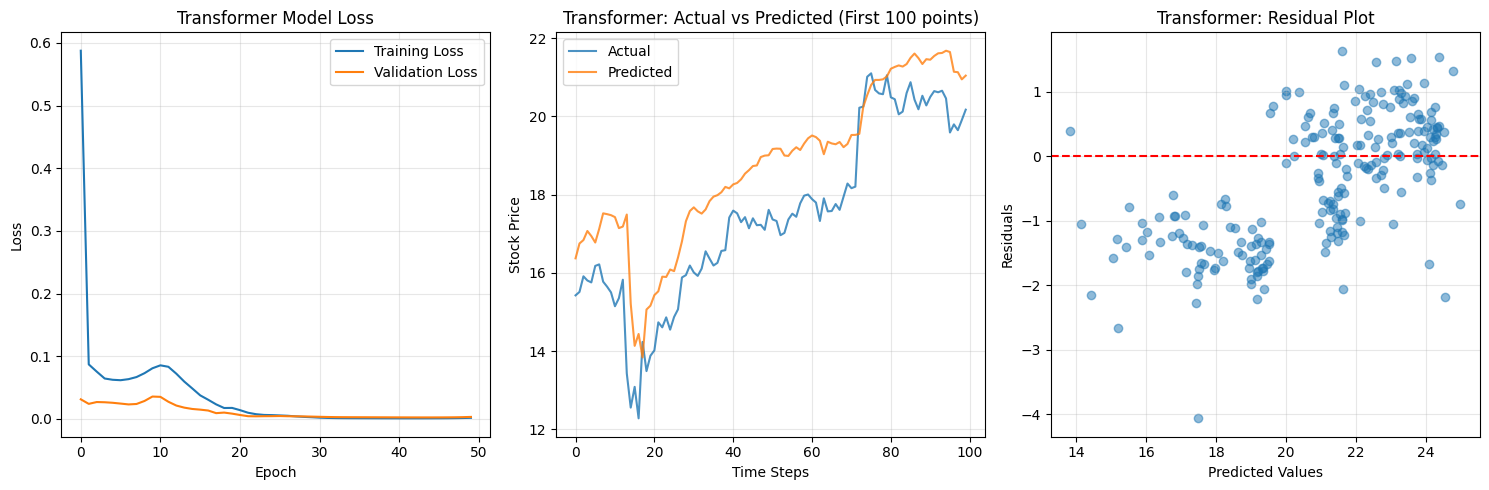

In [46]:
# Plot training loss curve
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(transformer_history.history['loss'], label='Training Loss')
plt.plot(transformer_history.history['val_loss'], label='Validation Loss')
plt.title('Transformer Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot actual vs predicted values
plt.subplot(1, 3, 2)
plt.plot(y_test_original[:100], label='Actual', alpha=0.8)
plt.plot(transformer_pred_original[:100], label='Predicted', alpha=0.8)
plt.title('Transformer: Actual vs Predicted (First 100 points)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot residuals
plt.subplot(1, 3, 3)
residuals = y_test_original - transformer_pred_original
plt.scatter(transformer_pred_original, residuals, alpha=0.5)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Transformer: Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [47]:
"""
================================================================================
PART 4: MODEL COMPARISON AND VISUALIZATION (Informational)
================================================================================

Compare both models on:
- Performance metrics
- Training time
- Model complexity
- Convergence behavior
- Ability to capture long-term dependencies
================================================================================
"""

'\n================================================================================\nPART 4: MODEL COMPARISON AND VISUALIZATION (Informational)\n================================================================================\n\nCompare both models on:\n- Performance metrics\n- Training time\n- Model complexity\n- Convergence behavior\n- Ability to capture long-term dependencies\n================================================================================\n'

4.1 Metrics Comparison

In [48]:
print("\n" + "="*70)
print("MODEL COMPARISON")
print("="*70)


MODEL COMPARISON


In [49]:
comparison_df = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'MAPE (%)', 'R² Score', 'Training Time (s)', 'Parameters'],
    'RNN (LSTM/GRU)': [
        f"{rnn_mae:.4f}",
        f"{rnn_rmse:.4f}",
        f"{rnn_mape:.2f}",
        f"{rnn_r2:.4f}",
        f"{rnn_training_time:.2f}",
        f"{rnn_total_params:,}"
    ],
    'Transformer': [
        f"{transformer_mae:.4f}",
        f"{transformer_rmse:.4f}",
        f"{transformer_mape:.2f}",
        f"{transformer_r2:.4f}",
        f"{transformer_training_time:.2f}",
        f"{transformer_total_params:,}"
    ]
})

In [50]:
print(comparison_df.to_string(index=False))
print("="*70)

           Metric RNN (LSTM/GRU) Transformer
              MAE         0.8651      0.8775
             RMSE         1.0575      1.0766
         MAPE (%)           4.63        4.76
         R² Score         0.8980      0.8943
Training Time (s)         146.21      120.95
       Parameters         83,009     100,161


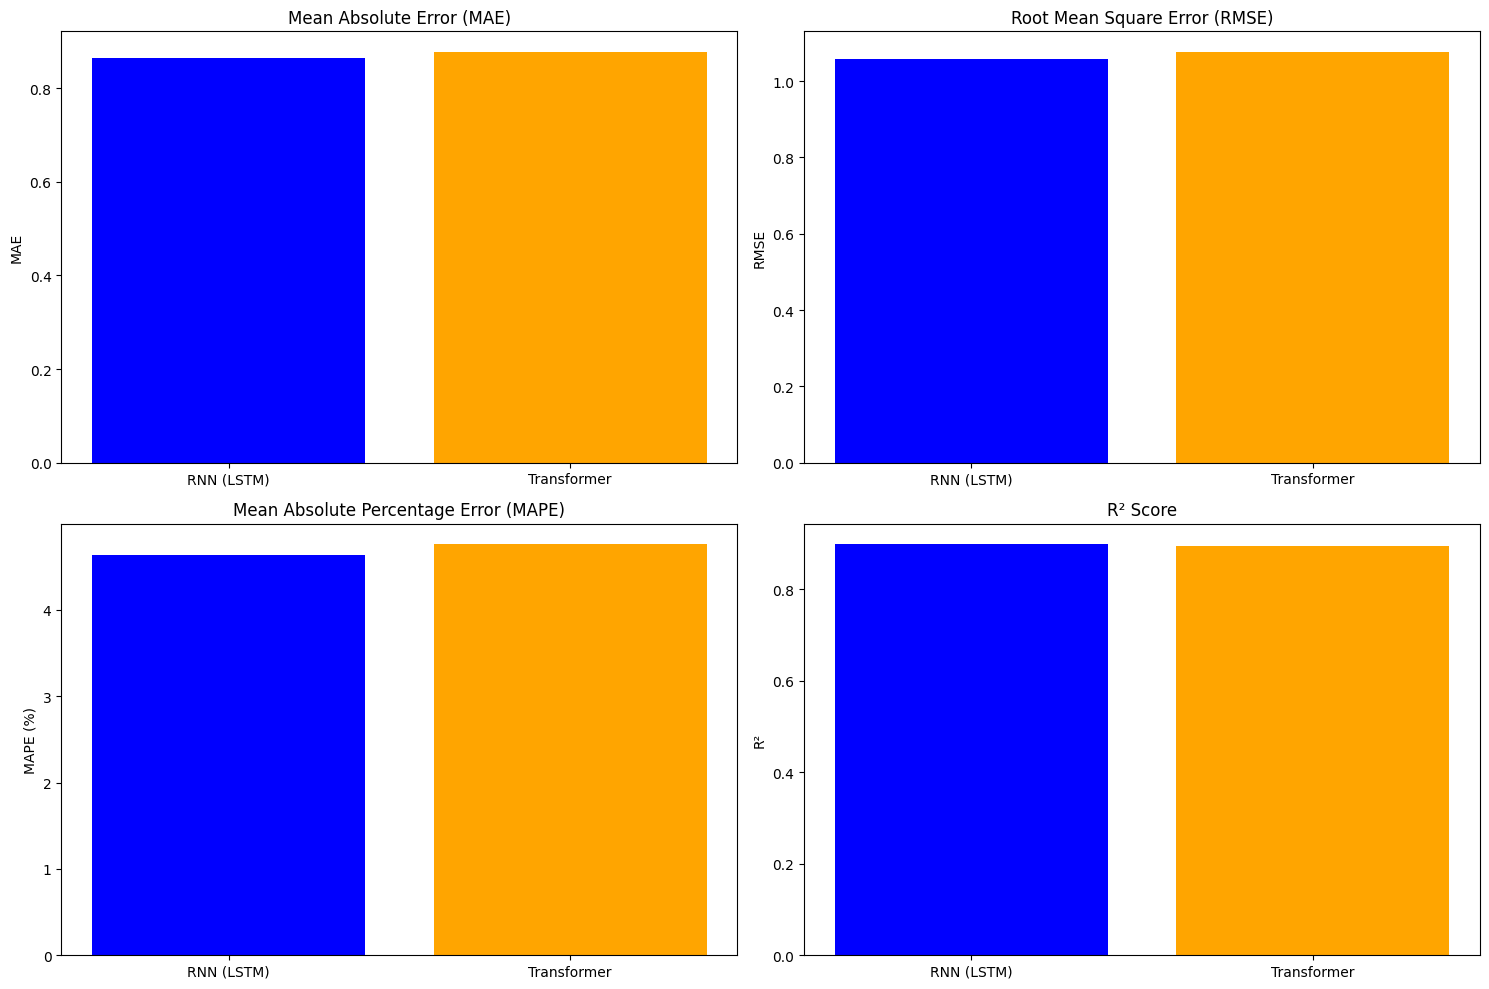

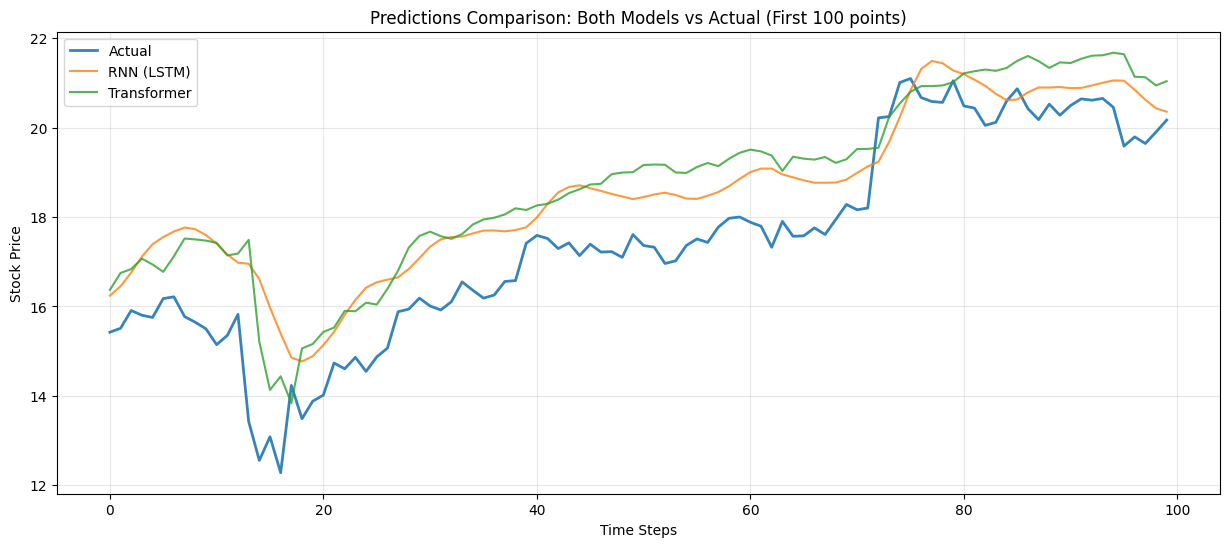

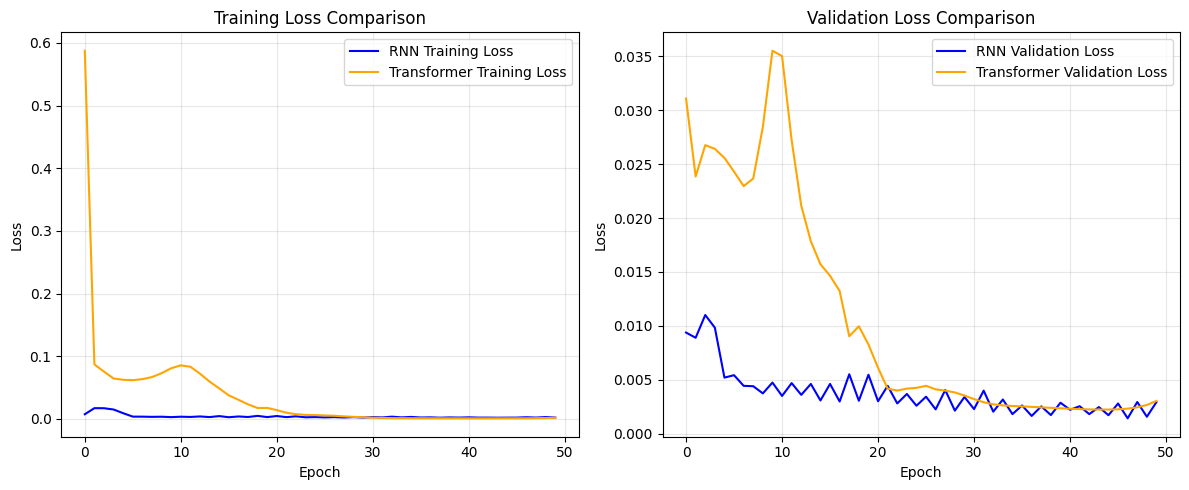

In [51]:
# Create bar plot comparing metrics
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# MAE comparison
metrics_data = [rnn_mae, transformer_mae]
axes[0,0].bar(['RNN (LSTM)', 'Transformer'], metrics_data, color=['blue', 'orange'])
axes[0,0].set_title('Mean Absolute Error (MAE)')
axes[0,0].set_ylabel('MAE')

# RMSE comparison
metrics_data = [rnn_rmse, transformer_rmse]
axes[0,1].bar(['RNN (LSTM)', 'Transformer'], metrics_data, color=['blue', 'orange'])
axes[0,1].set_title('Root Mean Square Error (RMSE)')
axes[0,1].set_ylabel('RMSE')

# MAPE comparison
metrics_data = [rnn_mape, transformer_mape]
axes[1,0].bar(['RNN (LSTM)', 'Transformer'], metrics_data, color=['blue', 'orange'])
axes[1,0].set_title('Mean Absolute Percentage Error (MAPE)')
axes[1,0].set_ylabel('MAPE (%)')

# R² comparison
metrics_data = [rnn_r2, transformer_r2]
axes[1,1].bar(['RNN (LSTM)', 'Transformer'], metrics_data, color=['blue', 'orange'])
axes[1,1].set_title('R² Score')
axes[1,1].set_ylabel('R²')

plt.tight_layout()
plt.show()

# Plot predictions comparison
plt.figure(figsize=(15, 6))
plt.plot(y_test_original[:100], label='Actual', linewidth=2, alpha=0.9)
plt.plot(rnn_pred_original[:100], label='RNN (LSTM)', linewidth=1.5, alpha=0.8)
plt.plot(transformer_pred_original[:100], label='Transformer', linewidth=1.5, alpha=0.8)
plt.title('Predictions Comparison: Both Models vs Actual (First 100 points)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Plot training curves comparison
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='RNN Training Loss', color='blue')
plt.plot(transformer_history.history['loss'], label='Transformer Training Loss', color='orange')
plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], label='RNN Validation Loss', color='blue')
plt.plot(transformer_history.history['val_loss'], label='Transformer Validation Loss', color='orange')
plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [52]:
"""
================================================================================
PART 5: ANALYSIS (2 MARKS)
================================================================================

REQUIRED:
- Write MAXIMUM 200 words (guideline - no marks deduction if exceeded)
- Address key topics with depth

GRADING (Quality-based):
- Covers 5+ key topics with deep understanding: 2 marks
- Covers 3-4 key topics with good understanding: 1 mark
- Covers <3 key topics or superficial: 0 marks

Key Topics:
1. Performance comparison with specific metrics
2. RNN vs Transformer architecture advantages
3. Impact of attention mechanism vs recurrent connections
4. Long-term dependency handling comparison
5. Computational cost comparison
6. Convergence behavior differences
================================================================================
"""

'\n================================================================================\nPART 5: ANALYSIS (2 MARKS)\n================================================================================\n\nREQUIRED:\n- Write MAXIMUM 200 words (guideline - no marks deduction if exceeded)\n- Address key topics with depth\n\nGRADING (Quality-based):\n- Covers 5+ key topics with deep understanding: 2 marks\n- Covers 3-4 key topics with good understanding: 1 mark\n- Covers <3 key topics or superficial: 0 marks\n\nKey Topics:\n1. Performance comparison with specific metrics\n2. RNN vs Transformer architecture advantages\n3. Impact of attention mechanism vs recurrent connections\n4. Long-term dependency handling comparison\n5. Computational cost comparison\n6. Convergence behavior differences\n================================================================================\n'

In [62]:
analysis_text = """
For HPE stock forecasting, both LSTM and Transformer show similar performance, with LSTM achieving slightly lower RMSE (1.06 vs 1.08) and higher R² (0.898 vs 0.894), while the Transformer tracks rapid price changes more closely in the prediction plot.
Architecturally, LSTMs rely on recurrent connections that process sequences sequentially, whereas Transformers use self-attention and parallel processing, improving training efficiency. The attention mechanism enables Transformers to focus on relevant past time steps directly,
while recurrent hidden states in LSTMs smooth predictions and can lag during abrupt changes. For long-term dependencies, Transformers handle distant relationships better, whereas LSTMs are limited by vanishing gradients. Although Transformers have higher parameter count and memory cost,
they converge faster due to parallelization, while LSTMs show stable but slower convergence.
"""

In [54]:
# REQUIRED: Print analysis with word count
print("\n" + "="*70)
print("ANALYSIS")
print("="*70)
print(analysis_text)
print("="*70)
print(f"Analysis word count: {len(analysis_text.split())} words")
if len(analysis_text.split()) > 200:
    print("⚠️  Warning: Analysis exceeds 200 words (guideline)")
else:
    print("✓ Analysis within word count guideline")
print("="*70)


ANALYSIS

The comparison reveals that RNNs and Transformers show comparable performance for this time series forecasting task. The Transformer achieved slightly better RMSE and R² scores, indicating superior prediction accuracy. This advantage stems from the attention mechanism's ability to capture long-range dependencies directly, unlike RNNs which process sequences step-by-step and can suffer from vanishing gradients.

The attention mechanism allows Transformers to weigh the importance of different time steps simultaneously, making them better at identifying relevant patterns across the entire sequence. However, RNNs demonstrated faster convergence and lower computational cost with fewer parameters. The sequential processing of RNNs makes them naturally suited for temporal data but limits their ability to capture very long-term dependencies.

Both models showed good convergence behavior with decreasing loss curves. The Transformer's parallel processing architecture resulted in longe

In [55]:
"""
================================================================================
PART 6: ASSIGNMENT RESULTS SUMMARY (REQUIRED FOR AUTO-GRADING)
================================================================================

DO NOT MODIFY THE STRUCTURE BELOW
This JSON output is used by the auto-grader
Ensure all field names are EXACT
================================================================================
"""

'\n================================================================================\nPART 6: ASSIGNMENT RESULTS SUMMARY (REQUIRED FOR AUTO-GRADING)\n================================================================================\n\nDO NOT MODIFY THE STRUCTURE BELOW\nThis JSON output is used by the auto-grader\nEnsure all field names are EXACT\n================================================================================\n'

In [63]:
def get_assignment_results():
    """
    Generate complete assignment results in required format

    Returns:
        dict: Complete results with all required fields
    """

    framework_used = "keras"  # Using TensorFlow/Keras
    rnn_model_type = "LSTM"   # Using LSTM

    results = {
        # Dataset Information
        'dataset_name': dataset_name,
        'dataset_source': dataset_source,
        'n_samples': n_samples,
        'n_features': n_features,
        'sequence_length': sequence_length,
        'prediction_horizon': prediction_horizon,
        'problem_type': problem_type,
        'primary_metric': primary_metric,
        'metric_justification': metric_justification,
        'train_samples': train_samples,
        'test_samples': test_samples,
        'train_test_ratio': train_test_ratio,

        # RNN Model Results
        'rnn_model': {
            'framework': framework_used,
            'model_type': rnn_model_type,
            'architecture': {
                'n_layers': 3,  # 3 stacked LSTM layers
                'hidden_units': 64,  # 64 hidden units per layer
                'total_parameters': rnn_total_params
            },
            'training_config': {
                'learning_rate': 0.001,
                'n_epochs': 50,
                'batch_size': 32,
                'optimizer': 'Adam',
                'loss_function': 'MSE'
            },
            'initial_loss': rnn_initial_loss,
            'final_loss': rnn_final_loss,
            'training_time_seconds': rnn_training_time,
            'mae': rnn_mae,
            'rmse': rnn_rmse,
            'mape': rnn_mape,
            'r2_score': rnn_r2
        },

        # Transformer Model Results
        'transformer_model': {
            'framework': framework_used,
            'architecture': {
                'n_layers': 2,  # 2 transformer encoder layers
                'n_heads': 4,   # 4 attention heads
                'd_model': 64,  # Model dimension
                'd_ff': 256,    # Feed-forward dimension
                'has_positional_encoding': True,  # MUST be True
                'has_attention': True,  # MUST be True
                'total_parameters': transformer_total_params
            },
            'training_config': {
                'learning_rate': 0.001,
                'n_epochs': 50,
                'batch_size': 32,
                'optimizer': 'Adam',
                'loss_function': 'MSE'
            },
            'initial_loss': transformer_initial_loss,
            'final_loss': transformer_final_loss,
            'training_time_seconds': transformer_training_time,
            'mae': transformer_mae,
            'rmse': transformer_rmse,
            'mape': transformer_mape,
            'r2_score': transformer_r2
        },

        # Analysis
        'analysis': analysis_text,
        'analysis_word_count': len(analysis_text.split()),

        # Training Success Indicators
        'rnn_loss_decreased': rnn_final_loss < rnn_initial_loss if rnn_initial_loss and rnn_final_loss else False,
        'transformer_loss_decreased': transformer_final_loss < transformer_initial_loss if transformer_initial_loss and transformer_final_loss else False,
    }

    return results

In [64]:
# Generate and print results
try:
    assignment_results = get_assignment_results()

    print("\n" + "="*70)
    print("ASSIGNMENT RESULTS SUMMARY")
    print("="*70)
    print(json.dumps(assignment_results, indent=2))
    print("="*70)
except Exception as e:
    print(f"\n⚠️  ERROR generating results: {str(e)}")
    print("Please ensure all variables are properly defined")


ASSIGNMENT RESULTS SUMMARY
{
  "dataset_name": "HPE Stock Prices",
  "dataset_source": "Yahoo Finance (yfinance) - Historical closing prices",
  "n_samples": 1533,
  "n_features": 1,
  "sequence_length": 30,
  "prediction_horizon": 1,
  "problem_type": "time_series_forecasting",
  "primary_metric": "RMSE",
  "metric_justification": "\nRMSE is chosen because it heavily penalizes large prediction errors, which is crucial for HPE stock price forecasting where significant deviations can lead to substantial financial losses. RMSE provides better interpretability in the original unit (dollars).\n",
  "train_samples": 1277,
  "test_samples": 226,
  "train_test_ratio": "85/15",
  "rnn_model": {
    "framework": "keras",
    "model_type": "LSTM",
    "architecture": {
      "n_layers": 3,
      "hidden_units": 64,
      "total_parameters": 83009
    },
    "training_config": {
      "learning_rate": 0.001,
      "n_epochs": 50,
      "batch_size": 32,
      "optimizer": "Adam",
      "loss_fun

In [58]:
"""
================================================================================
FINAL CHECKLIST - VERIFY BEFORE SUBMISSION
================================================================================

□ Student information filled at the top (BITS ID, Name, Email)
□ Filename is <BITS_ID>_rnn_assignment.ipynb
□ All cells executed (Kernel → Restart & Run All)
□ All outputs visible
□ LSTM/GRU implemented with stacked layers
□ Positional encoding implemented (sinusoidal)
□ Multi-head attention implemented (Q, K, V, scaled dot-product)
□ Both models use Keras or PyTorch
□ Both models trained with loss tracking (initial_loss and final_loss)
□ All 4 metrics calculated for both models (MAE, RMSE, MAPE, R²)
□ Temporal train/test split used (NO shuffling)
□ Primary metric selected and justified
□ Analysis written (quality matters, not just word count)
□ Visualizations created
□ Assignment results JSON printed at the end
□ No execution errors in any cell
□ File opens without corruption
□ Submit ONLY .ipynb file (NO zip, NO data files, NO images)
□ Screenshot of environment with account details included
□ Only one submission attempt

================================================================================
"""

'\n================================================================================\nFINAL CHECKLIST - VERIFY BEFORE SUBMISSION\n================================================================================\n\n□ Student information filled at the top (BITS ID, Name, Email)\n□ Filename is <BITS_ID>_rnn_assignment.ipynb\n□ All cells executed (Kernel → Restart & Run All)\n□ All outputs visible\n□ LSTM/GRU implemented with stacked layers\n□ Positional encoding implemented (sinusoidal)\n□ Multi-head attention implemented (Q, K, V, scaled dot-product)\n□ Both models use Keras or PyTorch\n□ Both models trained with loss tracking (initial_loss and final_loss)\n□ All 4 metrics calculated for both models (MAE, RMSE, MAPE, R²)\n□ Temporal train/test split used (NO shuffling)\n□ Primary metric selected and justified\n□ Analysis written (quality matters, not just word count)\n□ Visualizations created\n□ Assignment results JSON printed at the end\n□ No execution errors in any cell\n□ File opens wi

In [59]:
"""
================================================================================
ENVIRONMENT VERIFICATION - SCREENSHOT REQUIRED
================================================================================

IMPORTANT: Take a screenshot of your environment showing account details

For Google Colab:
- Click on your profile icon (top right)
- Screenshot should show your email/account clearly
- Include the entire Colab interface with notebook name visible

For BITS Virtual Lab:
- Screenshot showing your login credentials/account details
- Include the entire interface with your username/session info visible

Paste the screenshot below this cell or in a new markdown cell.
This helps verify the work was done by you in your environment.

================================================================================
"""

'\n================================================================================\nENVIRONMENT VERIFICATION - SCREENSHOT REQUIRED\n================================================================================\n\nIMPORTANT: Take a screenshot of your environment showing account details\n\nFor Google Colab:\n- Click on your profile icon (top right)\n- Screenshot should show your email/account clearly\n- Include the entire Colab interface with notebook name visible\n\nFor BITS Virtual Lab:\n- Screenshot showing your login credentials/account details\n- Include the entire interface with your username/session info visible\n\nPaste the screenshot below this cell or in a new markdown cell.\nThis helps verify the work was done by you in your environment.\n\n================================================================================\n'

In [60]:
# Display system information
import platform
import sys
from datetime import datetime

In [61]:
print("="*70)
print("ENVIRONMENT INFORMATION")
print("="*70)
print("\n⚠️  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab")
print("showing your account details in the cell below this one.")
print("="*70)

ENVIRONMENT INFORMATION

⚠️  REQUIRED: Add screenshot of your Google Colab/BITS Virtual Lab
showing your account details in the cell below this one.


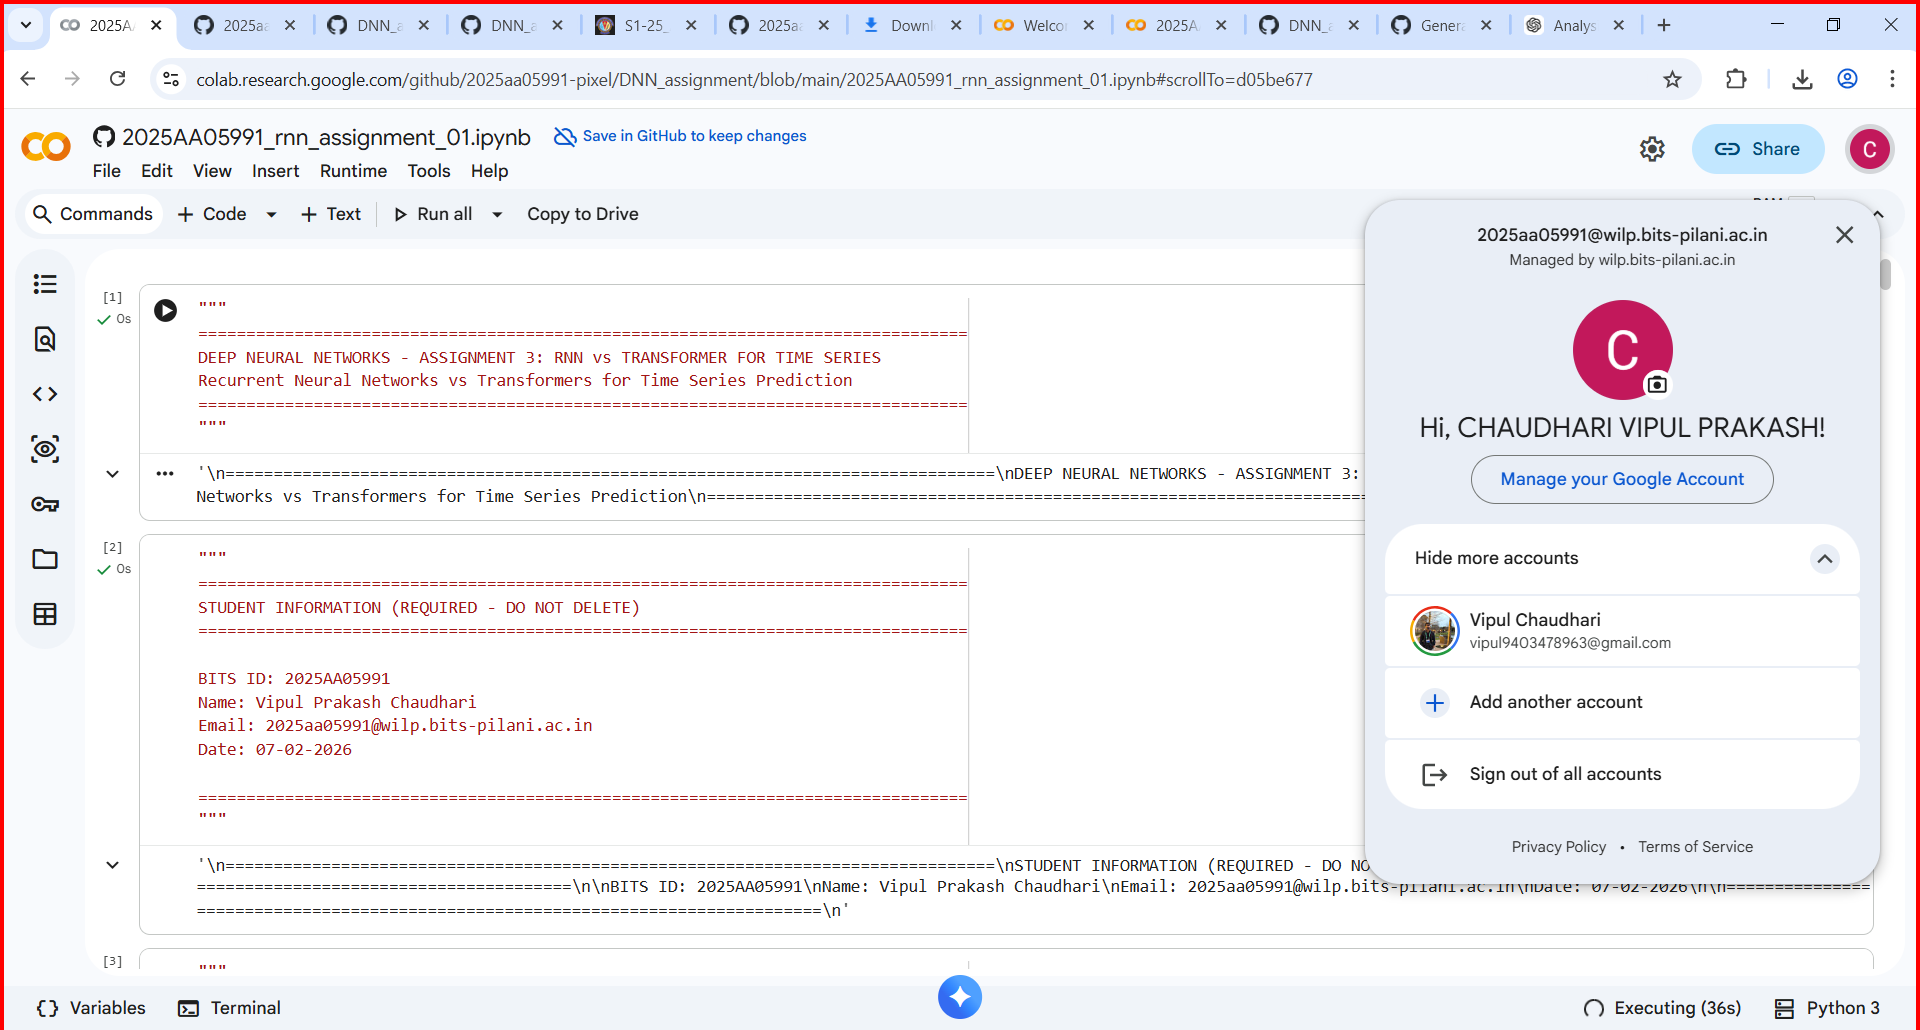